# Installing and importing packages

In [ ]:
!pip install psaw

In [ ]:
!pip install praw
import praw
reddit = praw.Reddit(client_id='emtvASfTFxu7iH8mKJHf-Q', client_secret='L4EzkLMARxlBkx98SPHAFRxQNhlFzQ', user_agent='Test app')

In [ ]:
# Importing packages 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as plt
import os
from os import path
from wordcloud import WordCloud
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from psaw import PushshiftAPI
import datetime as dt
import pandas as pd
api = PushshiftAPI()

# Extracting the top 50 subreddit posts from 2014-2016, and analysing them for frequent words

/usr/local/lib/python3.7/dist-packages/psaw/PushshiftAPI.py:252: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)
It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bot

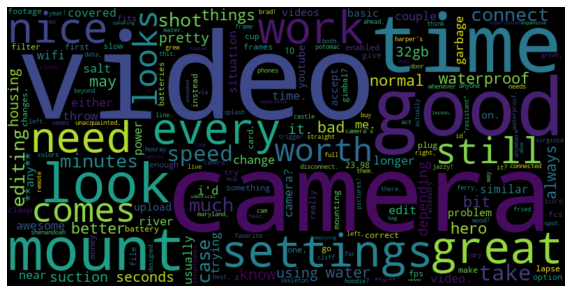

In [ ]:
start_epoch=int(dt.datetime(2014, 1, 1).timestamp())
end_epoch=int(dt.datetime(2016, 1, 1).timestamp())

k = list(api.search_submissions(after=start_epoch,
                            before=end_epoch,
                            subreddit='gopro',
                            type='top',
                            #filter=['url','author', 'title', 'subreddit'],
                            limit=50))
    
df = pd.DataFrame([thing.d_ for thing in k])
comments = []
for i in df['id']:
  submission = reddit.submission(i)
  for top_level_comment in submission.comments:
    a=top_level_comment.body
    comments.append(a)

# Convert each sentence to lowercase and drop punctuation
df_count = pd.DataFrame(comments)
df_count = df_count.apply(lambda x: x.astype(str).str.lower())
df_count.columns = ["a"]
df_count['a'] = df_count['a'].replace(r'[^\w\s]+', '')
df_count['a'] = df_count['a'].replace("'", '')
df_count['a'] = df_count['a'].replace(".", '')
df_count['a'] = df_count['a'].replace(",", '')

# Counting most common words

counts = Counter(" ".join(df_count['a']).split()).most_common(1000)
countsdf= pd.DataFrame(counts)

# Tokenizing words
wostop = []
words = countsdf[0]
stops = set(stopwords.words('english'))
new_stopwords = ['like', 'one', 'said', 'get', 'went', 'even', 'told', 'could', 'would', 'see', "that's", "i'm", "i 'm", 'got', 'gopro', 'use']
stops = stops.union(new_stopwords)
for line in words:
  if line not in stops:
    wostop.append(line)

# Creating a dataframe of counts of words
countsdf1 = countsdf[countsdf[0].isin(wostop)]

# Plotting word frequency plot
dataplot = dict(zip(countsdf1[0].tolist(), countsdf1[1].tolist()))

# Generate a word cloud image
wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(dataplot)

# Display the generated image:
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Extracting the top 50 subreddit posts from 2016-2018, and analysing them for frequent words

/usr/local/lib/python3.7/dist-packages/psaw/PushshiftAPI.py:252: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)
It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bot

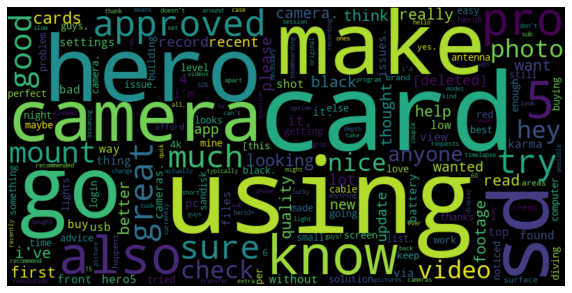

In [ ]:
start_epoch=int(dt.datetime(2016, 1, 1).timestamp())
end_epoch=int(dt.datetime(2018, 1, 1).timestamp())

k = list(api.search_submissions(after=start_epoch,
                            before=end_epoch,
                            subreddit='gopro',
                            type='top',
                            #filter=['url','author', 'title', 'subreddit'],
                            limit=50))
    
df = pd.DataFrame([thing.d_ for thing in k])
comments = []
for i in df['id']:
  submission = reddit.submission(i)
  for top_level_comment in submission.comments:
    a=top_level_comment.body
    comments.append(a)

# Convert each sentence to lowercase and drop punctuation
df_count = pd.DataFrame(comments)
df_count = df_count.apply(lambda x: x.astype(str).str.lower())
df_count.columns = ["a"]
df_count['a'] = df_count['a'].replace(r'[^\w\s]+', '')
df_count['a'] = df_count['a'].replace("'", '')
df_count['a'] = df_count['a'].replace(".", '')
df_count['a'] = df_count['a'].replace(",", '')

# Counting most common words

counts = Counter(" ".join(df_count['a']).split()).most_common(1000)
countsdf= pd.DataFrame(counts)

# Tokenizing words
wostop = []
words = countsdf[0]
stops = set(stopwords.words('english'))
new_stopwords = ['like', 'one', 'said', 'get', 'went', 'even', 'told', 'could', 'would', 'see', "that's", "i'm", "i 'm", 'got', 'gopro', 'use']
stops = stops.union(new_stopwords)
for line in words:
  if line not in stops:
    wostop.append(line)

# Creating a dataframe of counts of words
countsdf1 = countsdf[countsdf[0].isin(wostop)]

# Plotting word frequency plot
dataplot = dict(zip(countsdf1[0].tolist(), countsdf1[1].tolist()))

# Generate a word cloud image
wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(dataplot)

# Display the generated image:
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Extracting the top 50 subreddit posts from 2018-2020, and analysing them for frequent words

/usr/local/lib/python3.7/dist-packages/psaw/PushshiftAPI.py:252: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)
It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bot

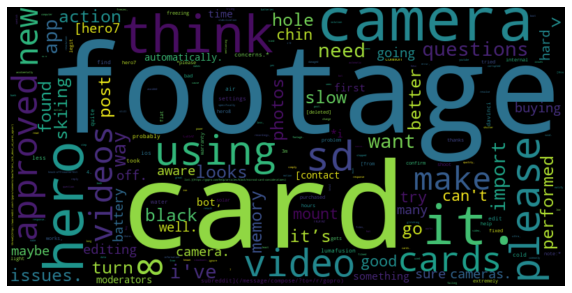

In [ ]:
start_epoch=int(dt.datetime(2018, 1, 1).timestamp())
end_epoch=int(dt.datetime(2020, 1, 1).timestamp())

k = list(api.search_submissions(after=start_epoch,
                            before=end_epoch,
                            subreddit='gopro',
                            type='top',
                            #filter=['url','author', 'title', 'subreddit'],
                            limit=50))
    
df = pd.DataFrame([thing.d_ for thing in k])
comments = []
for i in df['id']:
  submission = reddit.submission(i)
  for top_level_comment in submission.comments:
    a=top_level_comment.body
    comments.append(a)

# Convert each sentence to lowercase and drop punctuation
df_count = pd.DataFrame(comments)
df_count = df_count.apply(lambda x: x.astype(str).str.lower())
df_count.columns = ["a"]
df_count['a'] = df_count['a'].replace(r'[^\w\s]+', '')
df_count['a'] = df_count['a'].replace("'", '')
df_count['a'] = df_count['a'].replace(".", '')
df_count['a'] = df_count['a'].replace(",", '')

# Counting most common words

counts = Counter(" ".join(df_count['a']).split()).most_common(1000)
countsdf= pd.DataFrame(counts)

# Tokenizing words
wostop = []
words = countsdf[0]
stops = set(stopwords.words('english'))
new_stopwords = ['like', 'one', 'said', 'get', 'went', 'even', 'told', 'could', 'would', 'see', "that's", "i'm", "i 'm", 'got', 'gopro', 'use']
stops = stops.union(new_stopwords)
for line in words:
  if line not in stops:
    wostop.append(line)

# Creating a dataframe of counts of words
countsdf1 = countsdf[countsdf[0].isin(wostop)]

# Plotting word frequency plot
dataplot = dict(zip(countsdf1[0].tolist(), countsdf1[1].tolist()))

# Generate a word cloud image
wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(dataplot)

# Display the generated image:
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Extracting the top 50 subreddit posts from 2020-2022, and analysing them for frequent words

/usr/local/lib/python3.7/dist-packages/psaw/PushshiftAPI.py:252: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)
It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bot

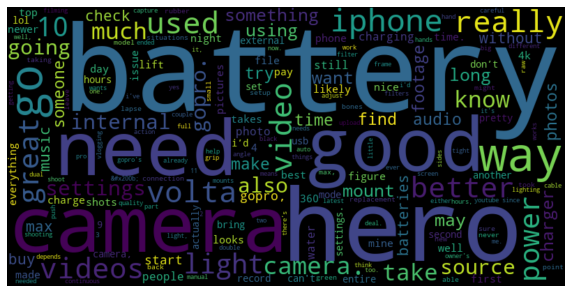

In [ ]:
start_epoch=int(dt.datetime(2020, 1, 1).timestamp())
end_epoch=int(dt.datetime(2022, 7, 7).timestamp())

k = list(api.search_submissions(after=start_epoch,
                            before=end_epoch,
                            subreddit='gopro',
                            type='top',
                            #filter=['url','author', 'title', 'subreddit'],
                            limit=50))
    
df = pd.DataFrame([thing.d_ for thing in k])
comments = []
for i in df['id']:
  submission = reddit.submission(i)
  for top_level_comment in submission.comments:
    a=top_level_comment.body
    comments.append(a)

# Convert each sentence to lowercase and drop punctuation
df_count = pd.DataFrame(comments)
df_count = df_count.apply(lambda x: x.astype(str).str.lower())
df_count.columns = ["a"]
df_count['a'] = df_count['a'].replace(r'[^\w\s]+', '')
df_count['a'] = df_count['a'].replace("'", '')
df_count['a'] = df_count['a'].replace(".", '')
df_count['a'] = df_count['a'].replace(",", '')

# Counting most common words

counts = Counter(" ".join(df_count['a']).split()).most_common(1000)
countsdf= pd.DataFrame(counts)

# Tokenizing words
wostop = []
words = countsdf[0]
stops = set(stopwords.words('english'))
new_stopwords = ['like', 'one', 'said', 'get', 'went', 'even', 'told', 'could', 'would', 'see', "that's", "i'm", "i 'm", 'got', 'gopro', 'use']
stops = stops.union(new_stopwords)
for line in words:
  if line not in stops:
    wostop.append(line)

# Creating a dataframe of counts of words
countsdf1 = countsdf[countsdf[0].isin(wostop)]

# Plotting word frequency plot
dataplot = dict(zip(countsdf1[0].tolist(), countsdf1[1].tolist()))

# Generate a word cloud image
wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(dataplot)

# Display the generated image:
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()